In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
with open('./datasets/pascal_voc_seg/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt') as val_file:
    val_list = val_file.readlines()
val_list = [x.strip() for x in val_list] 
val_count = len(val_list)

In [3]:
run_time_per_frame_in_seconds = 0.33
Accuracy = 0
Sensitivity = 0
Specificity = 0
Dice_Score = 0
Jaccard_coefficient = 0
Dice_Matrices = 0
for img_id in val_list:
    ground_truth = cv2.imread('./datasets/pascal_voc_seg/VOCdevkit/VOC2012/SegmentationClassRaw/' + img_id + '.png', -1)
    prediction = cv2.imread('./datasets/pascal_voc_seg/exp/vis/raw_segmentation_results/b\'' + img_id + '\'.png', -1)
    gt_1 = len(np.where(ground_truth==1)[0])
    comm_1 = len(np.where((ground_truth==1) & (prediction==1))[0])
    gt_2 = len(np.where(ground_truth==2)[0])
    comm_2 = len(np.where((ground_truth==2) & (prediction==2))[0])
    gt_3 = len(np.where(ground_truth==3)[0])
    comm_3 = len(np.where((ground_truth==3) & (prediction==3))[0])
    TP = comm_2 + comm_3
    TN = comm_1
    FN = gt_2 - comm_2 + gt_3 - comm_3
    FP = gt_1 -comm_1
    Accuracy += (TP + TN)/(TP + FP + TN + FN)
    Sensitivity += TP/(TP + FP)
    Specificity += TN/(TN + FN)
    Dice_Score += 2*TP/(2*TP + FP + FN)  
    Jaccard_coefficient += (comm_1 + comm_2 + comm_3)/(gt_1 + gt_2 + gt_3)
    Dice_Matrices += 2*(comm_1 + comm_2 + comm_3)/(gt_1 + gt_2 + gt_3)
Accuracy /= val_count
Sensitivity /= val_count
Specificity /= val_count
Dice_Score /= val_count
Jaccard_coefficient /= val_count
Dice_Matrices /= val_count
print('Jaccard_coefficient:', Jaccard_coefficient, ' Dice_Matrices:', Dice_Matrices, ' Accuracy:', \
      Accuracy, ' Sensitivity:', Sensitivity, ' Specificity:', Specificity, ' Dice_Score:', Dice_Score)

Jaccard_coefficient: 0.9143064038591596  Dice_Matrices: 1.8286128077183192  Accuracy: 0.9143064038591596  Sensitivity: 0.9269734245993825  Specificity: 0.9136380848080746  Dice_Score: 0.7140950168928338


<IPython.core.display.Javascript object>


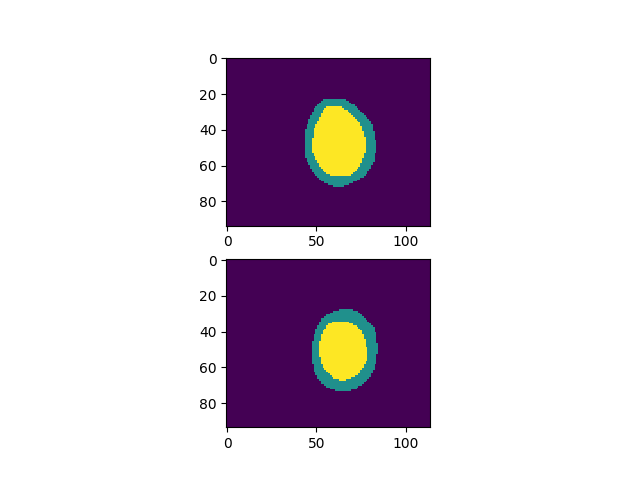

In [23]:
# %matplotlib notebook
# plt.subplot(2, 1, 1)
# plt.imshow(ground_truth)
# plt.subplot(2, 1, 2)
# plt.imshow(prediction)
# plt.show()